In [1]:
from numpy import *
from pandas import *
from matplotlib.pyplot import *
from seaborn import *
from os import *
from sklearn import *

In [2]:
bank = read_csv("bank.csv", delimiter = ";")
print(bank.shape)
print(path.getsize("bank.csv"))
bank.head()

(4521, 17)
461474


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
bank_full = read_csv("bank-full.csv", delimiter = ";")
print(bank_full.shape)
print(path.getsize("bank-full.csv"))
bank_full.head()

(45211, 17)
4610348


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


------

## Data Understanding

(Extracted from the bank-names.txt, section 7.)

Input variables:
   - bank client data:
       1. age (numeric)
       2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
       3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
       4. education (categorical: "unknown","secondary","primary","tertiary")
       5. default: has credit in default? (binary: "yes","no")
       6. balance: average yearly balance, in euros (numeric) 
       7. housing: has housing loan? (binary: "yes","no")
       8. loan: has personal loan? (binary: "yes","no")
   - related with the last contact of the current campaign:
       9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
       10. day: last contact day of the month (numeric)
       11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
       12. duration: last contact duration, in seconds (numeric)
   - other attributes:
       13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
       14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
       15. previous: number of contacts performed before this campaign and for this client (numeric)
       16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
   - Output variable (desired target):
       17. y - has the client subscribed a term deposit? (binary: "yes","no")


## Data Cleaning and Processing

1. Checking null and N/A values

In [4]:
print(bank_full.isnull().any())
print(bank_full.isna().any())

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool
age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool


No null or N/A values are presented

2. Checking outliers
    - First of all, select all columns with numeric values only (Focus on the smaller `bank` data first)

In [5]:
bank.skew(numeric_only=True)

age         0.699501
balance     6.596431
day         0.094627
duration    2.772420
campaign    4.743914
pdays       2.717071
previous    5.875259
dtype: float64

<AxesSubplot:xlabel='previous', ylabel='Count'>

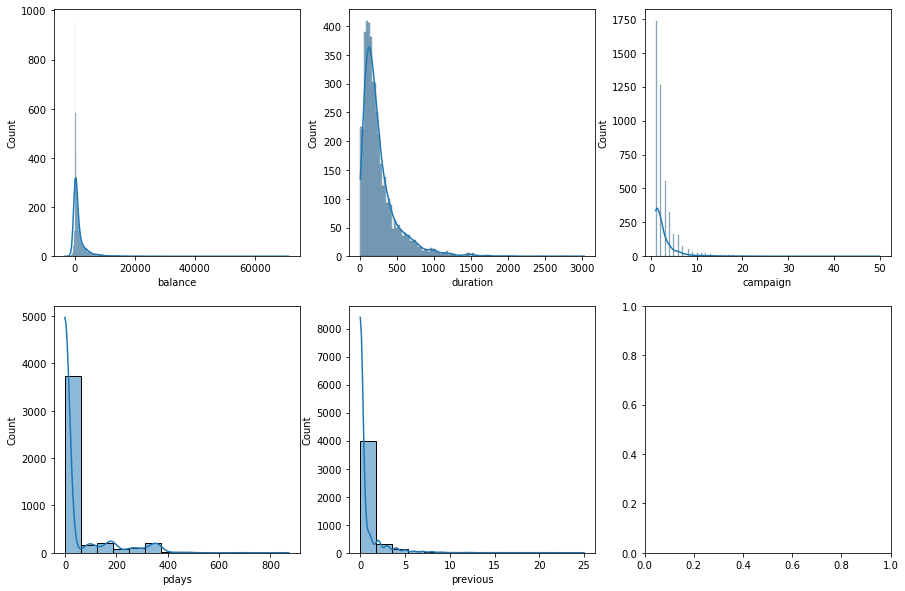

In [6]:
fig, axs = subplots(2,3, figsize=(15,10))
histplot(data = bank, x = "balance", kde = True, ax=axs[0,0])
histplot(data = bank, x = "duration", kde = True, ax=axs[0,1])
histplot(data = bank, x = "campaign", kde = True, ax=axs[0,2])
histplot(data = bank, x = "pdays", kde = True, ax=axs[1,0])
histplot(data = bank, x = "previous", kde = True, ax=axs[1,1])

The columns `balance`, `duration`, `campaign`, `pdays`, and `previous` are highly skewed to the right according to the table and plots. Therefore, perform log transformations on these columns.

<AxesSubplot:xlabel='logbalance', ylabel='Count'>

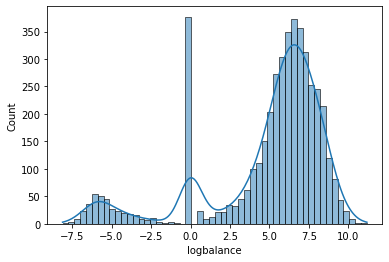

In [7]:
def reallog(x):
    if x < 0: return -log(-x)
    elif x == 0: return 0;
    else: return log(x)
bank["logbalance"] = bank['balance'].apply(reallog)
histplot(data = bank, x = "logbalance", kde = True)

Still highly skewed, perform another square root operation on it.

<AxesSubplot:xlabel='sqrtbalance', ylabel='Count'>

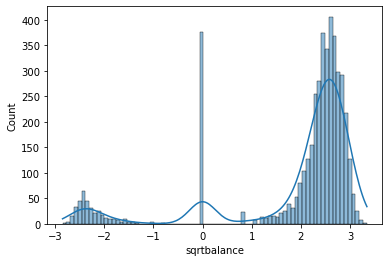

In [8]:
def realsqrt(x):
    if x < 0: return -sqrt(-x)
    else: return sqrt(x)
bank['sqrtbalance'] = bank['logbalance'].apply(realsqrt)
histplot(data = bank, x = "sqrtbalance", kde = True)

Perform similar log or square root transformations on other columns as well.

-0.5173183811595493


<AxesSubplot:xlabel='logduration', ylabel='Count'>

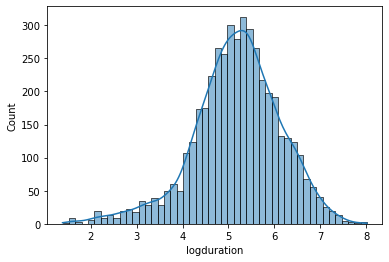

In [9]:
bank["logduration"] = bank['duration'].apply(reallog)
print(bank['logduration'].skew())
histplot(data = bank, x = "logduration", kde = True)

0.8709254966680438


<AxesSubplot:xlabel='logcampaign', ylabel='Count'>

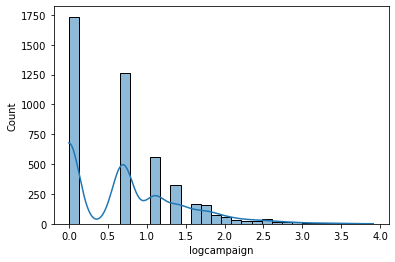

In [10]:
bank["logcampaign"] = bank['campaign'].apply(reallog)
print(bank['logcampaign'].skew())
histplot(data = bank, x = "logcampaign", kde = True)

1.731911306961672


<AxesSubplot:xlabel='logpdays', ylabel='Count'>

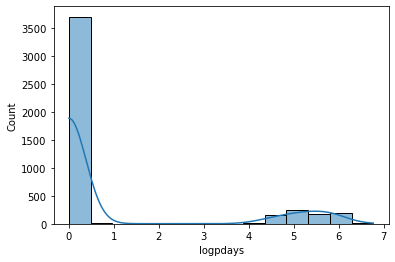

In [11]:
bank["logpdays"] = bank['pdays'].apply(reallog)
print(bank['logpdays'].skew())
histplot(data = bank, x = "logpdays", kde = True)

3.339249450238068


<AxesSubplot:xlabel='logprevious', ylabel='Count'>

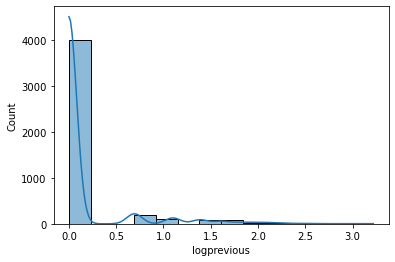

In [12]:
bank["logprevious"] = bank['previous'].apply(reallog)
print(bank['logprevious'].skew())
histplot(data = bank, x = "logprevious", kde = True)

As shown on the histograms, apart from bulk values of zero, the other values are not largely skewed.

3. One-hot encoding

As we can see from the data understanding part, a lot of the columns contain categorical value, which we have to convert to numerical values for model training. Here we apply one-hot encoding to each column.

In [13]:
bank_one_hot = get_dummies(bank, drop_first = True)

In [14]:
bank_one_hot.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'logbalance', 'sqrtbalance', 'logduration', 'logcampaign', 'logpdays',
       'logprevious', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object')

In [15]:
bank_one_hot = get_dummies(bank_one_hot, columns = ["day"], drop_first = True)

In [16]:
bank_one_hot.shape

(4521, 78)

## Model Selection

After one-hot encoding, our dataset now has 78 columns. (Also some of the values are duplicate, like `duration` and `logduration`, so delete them.) Then let's test out some common models.

Perform train-test split and cross validation at first.

In [17]:
bank_final = bank_one_hot.drop(columns = ["balance", "duration", "campaign", "pdays", "previous"])
bank_final_features = bank_final.drop(columns = ["y_yes"])
bank_final_outcome = bank_final["y_yes"]
#print(bank_final_outcome)

1. Linear regression model.


Maximum Accuracy That can be obtained from this model is: 27.853228465860468 %

Minimum Accuracy: 14.020831533324852 %

Overall Accuracy: 22.22353792964766 %

Standard Deviation is: 0.044872215883882474


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Accuracy')

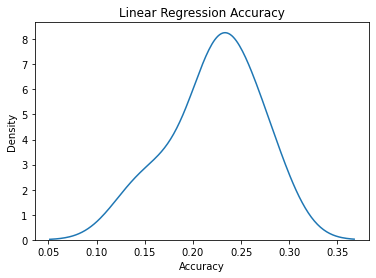

In [18]:
# Extracted and modified from https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/

from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets

# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(bank_final_features)

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=99)
scores_linear = []

reglinear = linear_model.LinearRegression()

for train_index, test_index in skf.split(bank_final_features, bank_final_outcome):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = bank_final_outcome[train_index], bank_final_outcome[test_index]
    reglinear.fit(x_train_fold, y_train_fold)
    scores_linear.append(reglinear.score(x_test_fold, y_test_fold))

print('\nMaximum Accuracy That can be obtained from this model is:', max(scores_linear)*100, '%')
print('\nMinimum Accuracy:', min(scores_linear)*100, '%')
print('\nOverall Accuracy:', mean(scores_linear)*100, '%')
print('\nStandard Deviation is:', stdev(scores_linear))
distplot(scores_linear, hist = False)
title("Linear Regression Accuracy")
xlabel("Accuracy")

As shown on the distributional plot, our linear regression model works very bad on both training and test sets, achieving a accuracy of only around 25%. This is consisitent with what we expected as our problem is a classification problem instead of regression one.

---

2. Logistic regression model 


Maximum Accuracy That can be obtained from this model is: 90.81272084805654 %

Minimum Accuracy: 88.84955752212389 %

Overall Accuracy: 89.55955470777698 %

Standard Deviation is: 0.007120413740049291


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Accuracy')

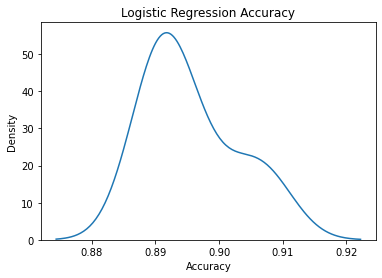

In [19]:
reglogistic = linear_model.LogisticRegression()
scores_logistic = []

for train_index, test_index in skf.split(bank_final_features, bank_final_outcome):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = bank_final_outcome[train_index], bank_final_outcome[test_index]
    reglogistic.fit(x_train_fold, y_train_fold)
    scores_logistic.append(reglogistic.score(x_test_fold, y_test_fold))

print('\nMaximum Accuracy That can be obtained from this model is:', max(scores_logistic)*100, '%')
print('\nMinimum Accuracy:', min(scores_logistic)*100, '%')
print('\nOverall Accuracy:', mean(scores_logistic)*100, '%')
print('\nStandard Deviation is:', stdev(scores_logistic))
distplot(scores_logistic, hist = False)
title("Logistic Regression Accuracy")
xlabel("Accuracy")

In [20]:
# Try WOE encoder for logistic regression
# Extracted and modified from https://www.kaggle.com/code/davidbnn92/weight-of-evidence-encoding/notebook

from category_encoders import *

bank_raw= read_csv("bank.csv", delimiter = ";")
bank_raw_features = bank_raw.copy().drop(columns = ["y"])
bank_features = bank_raw.drop(columns = ["y"])
col = bank_features.columns
bank_target = bank_raw["y"].map(dict(yes=1, no=0))
woe_encoder = WOEEncoder(cols = col)
woe_training_features = woe_encoder.fit_transform(bank_features, bank_target).add_suffix("_woe_encoded")
bank_features = bank_features.join(woe_training_features)
#display(bank_features)

'''columns = [col for col in train_features.columns if col != 'id']
woe_encoder = ce.WOEEncoder(cols=columns)
woe_encoded_train = woe_encoder.fit_transform(train_features[columns], train_targets).add_suffix('_woe')
train_features = train_features.join(woe_encoded_train)
woe_encoded_cols = woe_encoded_train.columns'''

"columns = [col for col in train_features.columns if col != 'id']\nwoe_encoder = ce.WOEEncoder(cols=columns)\nwoe_encoded_train = woe_encoder.fit_transform(train_features[columns], train_targets).add_suffix('_woe')\ntrain_features = train_features.join(woe_encoded_train)\nwoe_encoded_cols = woe_encoded_train.columns"

Using Weight of Evidence Encoder
Mean accuracy score: 91.042%

Using Target Encoder


D:\Anaconda\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."


Mean accuracy score: 88.675%

Using CatBoost Encoder
Mean accuracy score: 92.479%


Text(0.5, 6.79999999999999, 'Accuracy')

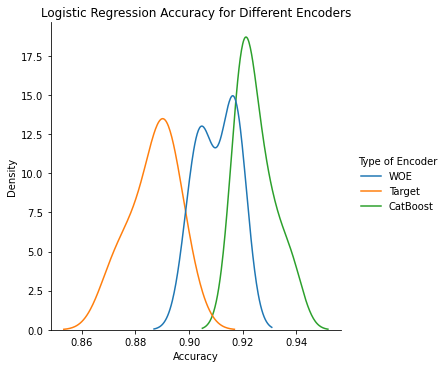

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

def logreg_test(cols, encoder):
    #auc_scores = []
    acc_scores = []
    
    skf = StratifiedKFold(n_splits=8, shuffle=True, random_state = 99).split(bank_features, bank_target)
    for train_id, valid_id in skf:
        enc_tr = encoder.fit_transform(bank_features.iloc[train_id,:], bank_target.iloc[train_id])
        enc_val = encoder.transform(bank_features.iloc[valid_id,:])
        regressor = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)
        regressor.fit(enc_tr, bank_target.iloc[train_id])
        acc_scores.append(regressor.score(enc_val, bank_target.iloc[valid_id]))
        probabilities = [pair[1] for pair in regressor.predict_proba(enc_val)]
        #auc_scores.append(roc_auc_score(bank_target.iloc[valid_id], probabilities))
        
    acc_scores = Series(acc_scores, name = "accuracy")
    mean_acc = acc_scores.mean() * 100
    print("Mean accuracy score: {:.3f}%".format(mean_acc))
    return acc_scores
    
    #auc_scores = Series(auc_scores)
    #mean_auc = auc_scores.mean() * 100
    #print("Mean AUC score: {:.3f}%".format(mean_auc))

##########################################
print("Using Weight of Evidence Encoder")
woe_encoder = WOEEncoder(cols=col)
acc_woe = logreg_test(col, woe_encoder)

##########################################
print("\nUsing Target Encoder")
targ_encoder = TargetEncoder(cols=col, smoothing=0.2)
acc_targ = logreg_test(col, targ_encoder)

##########################################
print("\nUsing CatBoost Encoder")
cb_encoder = CatBoostEncoder(cols=col)
acc_cb = logreg_test(col, cb_encoder)

acc_woe.index = ["WOE" for i in range(acc_woe.size)]
acc_targ.index = ["Target" for i in range(acc_targ.size)]
acc_cb.index = ["CatBoost" for i in range(acc_cb.size)]
df = concat([acc_woe, acc_targ, acc_cb], axis = 0).reset_index()
df.rename({"index": "Type of Encoder"}, axis = 1, inplace = True)
displot(data = df, x = "accuracy", hue = 'Type of Encoder', kind = "kde")
title("Logistic Regression Accuracy for Different Encoders")
xlabel("Accuracy")

D:\Anaconda\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."


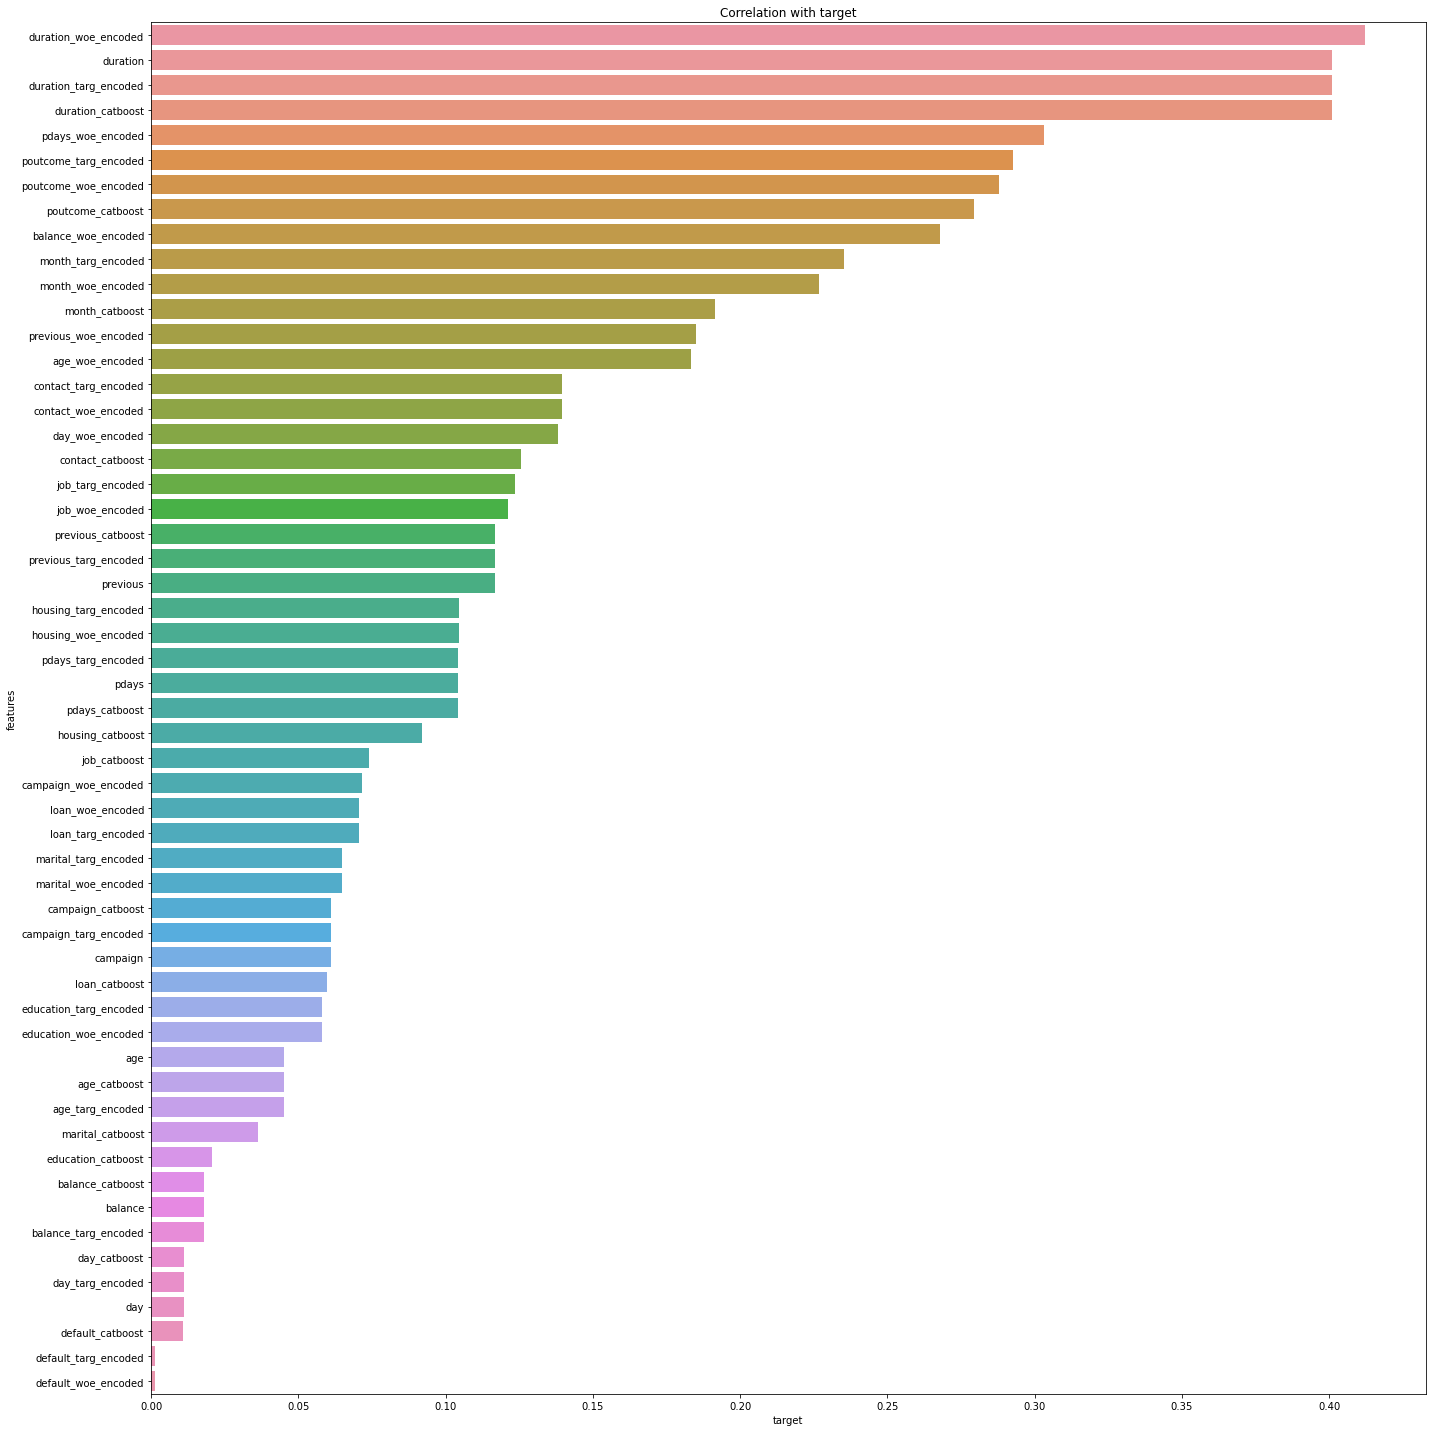

In [22]:
encoder = TargetEncoder(smoothing=0.2)
encoded_train = encoder.fit_transform(bank_raw_features, bank_target).add_suffix('_targ_encoded')
bank_features = bank_features.join(encoded_train)

encoder = CatBoostEncoder()
encoded_train = encoder.fit_transform(bank_raw_features, bank_target).add_suffix('_catboost')
bank_features = bank_features.join(encoded_train)

training_set = bank_features.copy()
training_set['target'] = bank_target
corrmat = training_set.corr()
corr_with_target = corrmat['target'].apply(abs).sort_values(ascending=False)
corr_with_target.drop(['target'], inplace=True)
df = DataFrame(data={'features': corr_with_target.index, 'target': corr_with_target.values})
figure(figsize=(20, 20))
barplot(x="target", y="features", data=df)
title('Correlation with target')
tight_layout()
show()

According to the correlation plot, the three most relevant features for our models are namely `duration`, `poutcome` and surprisingly, `month`. For most numeric-valued columns, the three encoders do not increase their corrlation with `target`; but if they do, WOE encoder generally has a larger increment on correlation compared to target encoder and CatBoost. This trend is especially apparent on highly skewed colunms like `pdays` and `balance`.

3. Ensemble model - random forest
    -  One-hot encoding

Accuracy: 0.894 (0.009)


Text(0.5, 6.79999999999999, 'Accuracy')

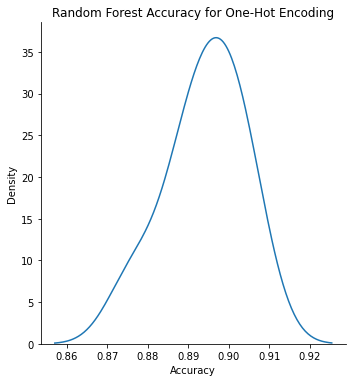

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#X_train, X_test, y_train, y_test = train_test_split(bank_features, bank_target, test_size=0.20)
skf = StratifiedKFold(n_splits=8, shuffle=True, random_state = 99).split(bank_final_features, bank_final_outcome)
random_forest_classifier = RandomForestClassifier(n_estimators = 10, random_state = 99)
random_forest_scores = cross_val_score(random_forest_classifier, bank_final_features, bank_final_outcome,
                                       scoring='accuracy', cv=skf, n_jobs=-1, error_score='raise')
displot(data = random_forest_scores, kind = "kde")
title("Random Forest Accuracy for One-Hot Encoding")
print('Accuracy: %.3f (%.3f)' % (mean(random_forest_scores), std(random_forest_scores)))
xlabel("Accuracy")


Using WOE Encoder
Accuracy: 0.92369 (0.00978)


D:\Anaconda\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."



Using Target Encoder
Accuracy: 0.89737 (0.00761)

Using Catboost Encoder
Accuracy: 0.88940 (0.00519)


Text(0.5, 6.79999999999999, 'Accuracy')

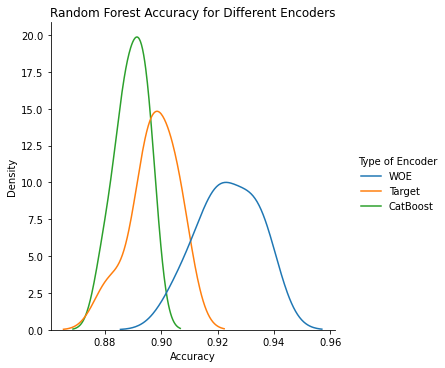

In [53]:
# Apply other three kinds of encoders.

bank_raw = read_csv("bank.csv", delimiter = ";")
bank_raw_features = bank_raw.drop(columns = ["y"])
bank_target = bank_raw["y"].map(dict(yes=1, no=0))

encoder = WOEEncoder()
woe_training_features = woe_encoder.fit_transform(bank_raw_features, bank_target).add_suffix("_woe_encoded")
#print(woe_training_features.head(5))
#bank_features = bank_raw_features.copy()
#bank_features = bank_features.join(woe_training_features)

skf = StratifiedKFold(n_splits=8, shuffle=True, random_state = 99).split(woe_training_features, bank_target)
random_forest_scores_woe = cross_val_score(random_forest_classifier, woe_training_features, bank_target,
                                       scoring='accuracy', cv=skf, n_jobs=-1, error_score='raise')
#displot(data = random_forest_scores_woe, kind = "kde")
#title("Random Forest Accuracy for WOE Encoding")
print("\nUsing WOE Encoder")
print('Accuracy: %.5f (%.5f)' % (mean(random_forest_scores_woe), std(random_forest_scores_woe)))
#xlabel("Accuracy")


#############################################

targ_encoder = TargetEncoder(smoothing=0.2)
targ_training_features = targ_encoder.fit_transform(bank_raw_features, bank_target).add_suffix("_targ_encoded")

skf = StratifiedKFold(n_splits=8, shuffle=True, random_state = 99).split(targ_training_features, bank_target)
#random_forest_classifier = RandomForestClassifier(n_estimators = 10, random_state = 99)
random_forest_scores_targ = cross_val_score(random_forest_classifier, targ_training_features, bank_target,
                                       scoring='accuracy', cv=skf, n_jobs=-1, error_score='raise')
#displot(data = random_forest_scores_woe, kind = "kde")
#title("Random Forest Accuracy for WOE Encoding")
print("\nUsing Target Encoder")
print('Accuracy: %.5f (%.5f)' % (mean(random_forest_scores_targ), std(random_forest_scores_targ)))
#xlabel("Accuracy")

#####################################

cb_encoder = CatBoostEncoder()
cb_training_features = cb_encoder.fit_transform(bank_raw_features, bank_target).add_suffix("_catboost")

skf = StratifiedKFold(n_splits=8, shuffle=True, random_state = 99).split(cb_training_features, bank_target)
#random_forest_classifier = RandomForestClassifier(n_estimators = 10, random_state = 99)
random_forest_scores_cb = cross_val_score(random_forest_classifier, cb_training_features, bank_target,
                                       scoring='accuracy', cv=skf, n_jobs=-1, error_score='raise')
#displot(data = random_forest_scores_woe, kind = "kde")
#title("Random Forest Accuracy for WOE Encoding")
print("\nUsing Catboost Encoder")
print('Accuracy: %.5f (%.5f)' % (mean(random_forest_scores_cb), std(random_forest_scores_cb)))
#xlabel("Accuracy")

"""random_forest_scores_woe.index = ["WOE" for i in range(random_forest_scores_woe.size)]
random_forest_scores_targ.index = ["Target" for i in range(random_forest_scores_targ.size)]
random_forest_scores_cb.index = ["CatBoost" for i in range(random_forest_scores_cb.size)]
rf_scores = concat([random_forest_scores_woe, random_forest_scores_targ, random_forest_scores_cb], axis = 0).reset_index()
rf_scores.rename({"index": "Type of Encoder"}, axis = 1, inplace = True)
displot(data = rf_scores, x = "accuracy", hue = 'Type of Encoder', kind = "kde")"""

rf = concat([Series(random_forest_scores_woe, index = ["WOE" for i in range(random_forest_scores_woe.size)]),
            Series(random_forest_scores_targ, index = ["Target" for i in range(random_forest_scores_targ.size)]),
            Series(random_forest_scores_cb, index = ["CatBoost" for i in range(random_forest_scores_cb.size)])], axis = 0).reset_index()
rf.rename({"index": "Type of Encoder", 0: "accuracy"}, axis = 1, inplace = True)
displot(data = rf, x = "accuracy", hue = 'Type of Encoder', kind = "kde")
title("Random Forest Accuracy for Different Encoders")
xlabel("Accuracy")